In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import EM_algorithm

In [3]:
a = EM_algorithm.mix_of_gaussians(3,0.000001,5,3)

In [4]:
# generate training data in the 2-d case
mean1 = np.array([1, 0])
mean2 = np.array([5, 0])
mean3 = np.array([10, 5])
cov1 = np.array([[0.8, 0.4], [0.4, 0.8]])
cov2 = np.array([[0.8, -0.4], [-0.4, 0.8]])
X1 = np.random.multivariate_normal(mean1, cov1, 3000)
X2 = np.random.multivariate_normal(mean2, cov2, 3000)
X3 = np.random.multivariate_normal(mean3, cov1, 3000)

In [5]:
X=np.append(X1,X2,axis=0)
X=np.append(X,X3,axis=0)

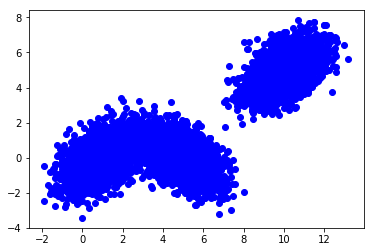

In [6]:
plt.scatter(X[:,0],X[:,1],c='b')
plt.show()

In [7]:
phi, means, variances = a.EM_main(X)

17
18
7
10
10
10
17
14
8
10
10
11
11
9
10
11
8
9
9
10


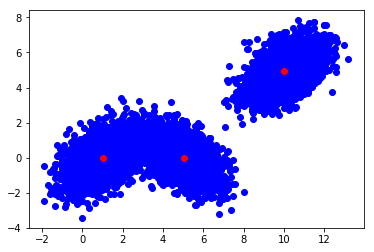

In [8]:
plt.scatter(X[:,0],X[:,1],c='b')
plt.scatter(means.T[0],means.T[1],c='r')
plt.show()

In [9]:
a.data_pdf(np.array([0.,5.]), phi, means, variances)

4.4842022962394846e-11

In [10]:
x1_lower, x2_lower = np.amin(X, axis=0)
x1_higher, x2_higher = np.amax(X, axis=0)
meshx, meshy = np.meshgrid(np.linspace(x1_lower, x1_higher,50), np.linspace(x2_lower, x2_higher,50))

In [11]:
m = np.size(X, axis=0)
z = np.zeros(np.shape(meshx))
for i in range(0,np.size(meshx, axis=0)):
    for j in range(0,np.size(meshx, axis=1)):
        v = np.array([meshx[i,j],meshy[i,j]])
        z[i,j] = a.data_pdf(v, phi, means, variances)

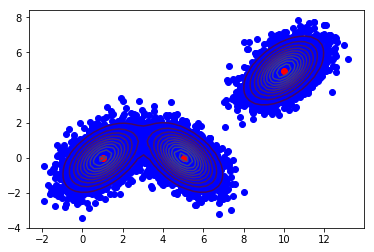

In [12]:
plt.scatter(X[:,0],X[:,1],c='b')
plt.scatter(means.T[0],means.T[1],c='r')
plt.contour(meshx, meshy, z, levels = np.arange(0.,0.5,0.01))
plt.show()